# MACHINE LEARNING PROJECT - CLUSTERING
### MARKETING CAMPAIGN CUSTOMERS SEGMENTATION

### CHIARA TOTARO

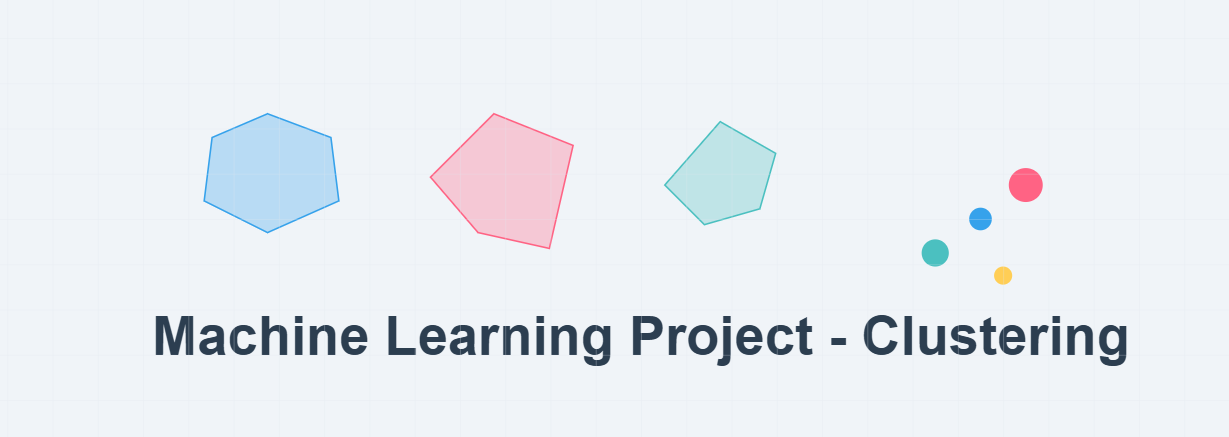

### 📌 Project Description  

This project implements advanced Machine Learning techniques to analyze and segment customers, aiming to optimize marketing strategies by identifying homogeneous groups with similar characteristics.

### 🚀 Key Features  

- Segmentation Technique: K-Means Clustering
- Objective: Personalization of marketing strategies


### 📊 Data source: dataset Marketing-Campaign
Open-source dataset available on Kaggle

El dataset empleado Marketing Campaign contiene información detallada sobre clientes de una empresa, enfocándose en sus datos demográficos, historial de compras y comportamiento frente a campañas de marketing.

🔹 Datos Demográficos: Incluye variables como el año de nacimiento, nivel educativo, estado civil e información sobre el número de niños y adolescentes en el hogar.

🔹 Información Financiera: Registra el ingreso anual del hogar del cliente.

🔹 Comportamiento de Compra: Refleja el gasto en diferentes categorías de productos (vino, carne, pescado, dulces, frutas, oro) en los últimos 2 años. También incluye el número de compras realizadas a través de distintos canales (tiendas, web, catálogo, descuentos).

🔹 Interacción con el Marketing: Mide la respuesta de los clientes a campañas promocionales, indicando cuántas ofertas han aceptado y si han visitado el sitio web recientemente.

Procesos:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


### Understanding the Problem  

The business problem I am going to solve is to segment customers into groups according to their buying patterns and behaviour so that the company can personalise marketing and loyalty strategies and maximise their effectiveness. 
To do this we are going to apply clustering techniques, i.e. unsupervised machine learning algorithms - Clustering.  

We have also applied PCA for dimensionality reduction.

----------------
### Entender el Problema  
El problema de negocio que voy a resolver es segmentar a los clientes en grupos según sus patrones de compra y comportamiento para que la empresa pueda personalizar estrategias de marketing y fidelización y maximizar su eficacia. 
Para hacerlo vamos a aplicar técnicas de clustering, es decir algoritmos de Machine learning no supervisado- Clustering.  

Tambien se ha aplicado PCA para reducion de dimensionalidad.

#### Import

In [13]:
import sys
sys.path.insert(0, '../')
import utils.common as cm
import utils.bootcampviztools as bt 

import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

import joblib


### Load the dataset

In [14]:
df = pd.read_csv('../data_sample/marketing_campaign.csv', sep=';')

### Exploración inicial

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [16]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


#### Data Dictionary

The dataset contains the following features:

``ID``: Unique ID of each customer  
``Year_Birth``: Customer’s year of birth   
``Education``: Customer's level of education  
``Marital_Status``: Customer's marital status  
``Kidhome``: Number of small children in customer's household  
``Teenhome``: Number of teenagers in customer's household  
``Income``: Customer's yearly household income in USD  
``Recency``: Number of days since the last purchase  
``Dt_Customer``: Date of customer's enrollment with the company  
``MntFishProducts``: The amount spent on fish products in the last 2 years  
``MntMeatProducts``: The amount spent on meat products in the last 2 years 
``MntFruits``: The amount spent on fruits products in the last 2 years  
``MntSweetProducts``: Amount spent on sweet products in the last 2 years  
``MntWines``: The amount spent on wine products in the last 2 years  
``MntGoldProds``: The amount spent on gold products in the last 2 years  
``NumDealsPurchases``: Number of purchases made with discount  
``NumCatalogPurchases``: Number of purchases made using a catalog (buying goods to be shipped through the mail)  
``NumStorePurchases``: Number of purchases made directly in stores  
``NumWebPurchases``: Number of purchases made through the company's website  
``NumWebVisitsMonth``: Number of visits to the company's website in the last month  
``AcceptedCmp1``: 1 if customer accepted the offer in the first campaign, 0 otherwise  
``AcceptedCmp2``: 1 if customer accepted the offer in the second campaign, 0 otherwise  
``AcceptedCmp3``: 1 if customer accepted the offer in the third campaign, 0 otherwise  
``AcceptedCmp4``: 1 if customer accepted the offer in the fourth campaign, 0 otherwise  
``AcceptedCmp5``: 1 if customer accepted the offer in the fifth campaign, 0 otherwise  
``Complain``: 1 If the customer complained in the last 2 years, 0 otherwise  
``Response``: 1 if customer accepted the offer in the last campaign, 0 otherwise  

Note: You can assume that the data is collected in the year 2015

<!-- ID: Unique ID of each customer
Year_Birth: Customer’s year of birth
Education: Customer's level of education
Marital_Status: Customer's marital status
Kidhome: Number of small children in customer's household
Teenhome: Number of teenagers in customer's household
Income: Customer's yearly household income in USD
Recency: Number of days since the last purchase
Dt_Customer: Date of customer's enrollment with the company
MntFishProducts: The amount spent on fish products in the last 2 years
MntMeatProducts: The amount spent on meat products in the last 2 years
MntFruits: The amount spent on fruits products in the last 2 years
MntSweetProducts: Amount spent on sweet products in the last 2 years
MntWines: The amount spent on wine products in the last 2 years
MntGoldProds: The amount spent on gold products in the last 2 years
NumDealsPurchases: Number of purchases made with discount
NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
NumStorePurchases: Number of purchases made directly in stores
NumWebPurchases: Number of purchases made through the company's website
NumWebVisitsMonth: Number of visits to the company's website in the last month
AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Complain: 1 If the customer complained in the last 2 years, 0 otherwise -->

### MiniEDA: Features selection

The Exploratory Analysis of the data is in the notebook MC_EDA.ipynb   

Click to open : [MiniEDA](../results_notebook/MC_EDA.ipynb)

The __preprocesado_df_marketing_campaign__ function returns the dataset clean, with derived features added and irrelevant columns removed.  

Df ready to apply Features Engineering and Modelling

In [17]:
X = cm.preprocesado_df_marketing_campaign(df)

In [18]:
X

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Age,Age_group,Income_group,TotalSons,Education_Level,Family_Status,Total_Spend,TotalAcceptedCmp,TotalPurchases,AmountPerPurchase
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,58,50-65,Medium to high income,0,Medium,AloneNoKids,1617,1,25,62.192308
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,61,50-65,Low to medium income,2,Medium,AloneWithKids,27,0,6,3.857143
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,50,35-50,High income,0,Medium,InPartneringNoKids,776,0,21,35.272727
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,31,<35,Low income,1,Medium,InPartneringWhitKids,53,0,8,5.888889
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,34,<35,Medium to high income,1,High,InPartneringWhitKids,422,0,19,21.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,48,35-50,Medium to high income,1,Medium,InPartneringWhitKids,1341,0,18,70.578947
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,69,+65,Medium to high income,3,High,InPartneringWhitKids,444,1,22,19.304348
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,34,<35,Medium to high income,0,Medium,AloneNoKids,1241,1,19,62.050000
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,59,50-65,High income,1,High,InPartneringWhitKids,843,0,23,35.125000


### Features Selection

##### Drop and selection features

### FEATURES ENGINEERING

##### Transformation and scaling

In [19]:
#Encoding
# feature Age_group
#model['Age_group'] = model['Age_group'].replace({'<35': 1, '35-50': 2 , '50-65': 3, '+65': 4}).astype(int)

# feature Educaion_Level
#model['Education_Level'] = model['Education_Level'].replace({'Basic': 1, 'Medium': 2, 'High':3}).astype(int)

# feature Family_Status
#model['Family_Status'] = model['Family_Status'].replace({'AloneNoKids': 4, 'InPartneringNoKids': 3, 'AloneWithKids': 2, 'InPartneringWhitKids': 1}).astype(int)

#feature Income_group
#X['Income_group'] = X['Income_group'].replace({'Low income': 1, 'Low to medium income': 2, 'Medium to high income': 3, 'High income': 4}).astype(int)

In [20]:
# Convertir variables categóricas a numéricas
# Codificación one-hot para Education y Marital_Status
age_dummies = pd.get_dummies(X['Age_group'], prefix='Age:')
education_dummies = pd.get_dummies(X['Education_Level'], prefix='Edu:')
family_dummies = pd.get_dummies(X['Family_Status']) #, prefix='Marital')
income_dummies = pd.get_dummies(X['Income_group']) #, prefix='')

# Unir datasets
model = pd.concat([X, education_dummies, family_dummies, age_dummies, income_dummies], axis=1)


In [21]:
model

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,InPartneringNoKids,InPartneringWhitKids,Age:_<35,Age:_35-50,Age:_50-65,Age:_+65,Low income,Low to medium income,Medium to high income,High income
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,False,False,False,False,True,False,False,False,True,False
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,False,False,False,False,True,False,False,True,False,False
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,True,False,False,True,False,False,False,False,False,True
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,False,True,True,False,False,False,True,False,False,False
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,False,True,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,False,True,False,True,False,False,False,False,True,False
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,False,True,False,False,False,True,False,False,True,False
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,False,False,True,False,False,False,False,False,True,False
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,False,True,False,False,True,False,False,False,False,True


In [22]:
model.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Age_group',
       'Income_group', 'TotalSons', 'Education_Level', 'Family_Status',
       'Total_Spend', 'TotalAcceptedCmp', 'TotalPurchases',
       'AmountPerPurchase', 'Edu:_Basic', 'Edu:_High', 'Edu:_Medium',
       'AloneNoKids', 'AloneWithKids', 'InPartneringNoKids',
       'InPartneringWhitKids', 'Age:_<35', 'Age:_35-50', 'Age:_50-65',
       'Age:_+65', 'Low income', 'Low to medium income',
       'Medium to high income', 'High income'],
      dtype='object')

In [23]:
modelo = model.copy()
modelo.drop( ['Year_Birth', 'Education', 'Marital_Status',  'Kidhome', #'Income'
       'Teenhome', 'Dt_Customer', 'Age', 'Complain', 'Recency', 
       'AmountPerPurchase', 'Age_group',
       'Income_group', 'TotalSons', 'Education_Level', 'Family_Status'], axis=1, inplace=True)
# model.drop( ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
#        'Teenhome', 'Dt_Customer', 'Recency', 
#         'Complain', 'Response', 'CustomerSinceInMonth', 'Age',
#        ], axis=1, inplace=True)
    # ['Dt_Customer','Kidhome', 'Teenhome', 'Recency', 'ID', 'Year_Birth','Income',''
    #  'Age','Z_CostContact', 'Z_Revenue'
    # ], axis=1, inplace=True)

In [24]:
modelo

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,InPartneringNoKids,InPartneringWhitKids,Age:_<35,Age:_35-50,Age:_50-65,Age:_+65,Low income,Low to medium income,Medium to high income,High income
0,58138.0,635,88,546,172,88,88,3,8,10,...,False,False,False,False,True,False,False,False,True,False
1,46344.0,11,1,6,2,1,6,2,1,1,...,False,False,False,False,True,False,False,True,False,False
2,71613.0,426,49,127,111,21,42,1,8,2,...,True,False,False,True,False,False,False,False,False,True
3,26646.0,11,4,20,10,3,5,2,2,0,...,False,True,True,False,False,False,True,False,False,False
4,58293.0,173,43,118,46,27,15,5,5,3,...,False,True,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,709,43,182,42,118,247,2,9,3,...,False,True,False,True,False,False,False,False,True,False
2236,64014.0,406,0,30,0,0,8,7,8,2,...,False,True,False,False,False,True,False,False,True,False
2237,56981.0,908,48,217,32,12,24,1,2,3,...,False,False,True,False,False,False,False,False,True,False
2238,69245.0,428,30,214,80,30,61,2,6,5,...,False,True,False,False,True,False,False,False,False,True


Normalize the data for better clustering performance

In [25]:

# # Normalizar los datos
# scaler = StandardScaler()
# scaled_model= pd.DataFrame(scaler.fit_transform(modelo), columns=modelo.columns)

In [26]:
log_transformed = np.log1p(modelo)  # Aplica transformación logarítmica

scaler = StandardScaler()  # Creas un escalador
scaled_model = pd.DataFrame(scaler.fit_transform(log_transformed), columns=modelo.columns)  # Escalas los datos

print(scaled_model.head())

     Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.445177  0.981921   1.428559         1.398364         1.574716   
1 -0.009267 -1.222332  -0.990259        -1.406008        -0.870793   
2  0.863003  0.760726   1.061091         0.463848         1.312479   
3 -1.118578 -1.222332  -0.406318        -0.699138        -0.087153   
4  0.450514  0.262319   0.979624         0.416939         0.788748   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0          1.407546      1.059762           0.658787         1.284113   
1         -0.976191     -0.921818           0.039981        -1.422883   
2          0.529795      0.492862          -0.832178         1.284113   
3         -0.540863     -1.041949           0.039981        -0.693139   
4          0.681255     -0.277576           1.530946         0.554368   

   NumCatalogPurchases  ...  InPartneringNoKids  InPartneringWhitKids  \
0             1.813984  ...           -0.454132             -0.9508

## Modelado

### Applying PCA to the data to visualize the data distributed in 2 dimensions

In [27]:
#  PCA
pca = PCA()
pca.fit(scaled_model)
    
# Calculo varianza explicada acumulada
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

#Fijo el % de explicabilidad
variance_threshold = 0.75
# Seleccionar número de componentes
n_components = np.argmax(cumulative_variance_ratio >= variance_threshold) + 1
    
print(f"Número de componentes para explicar {variance_threshold*100}% de varianza: {n_components}")
    


Número de componentes para explicar 75.0% de varianza: 11


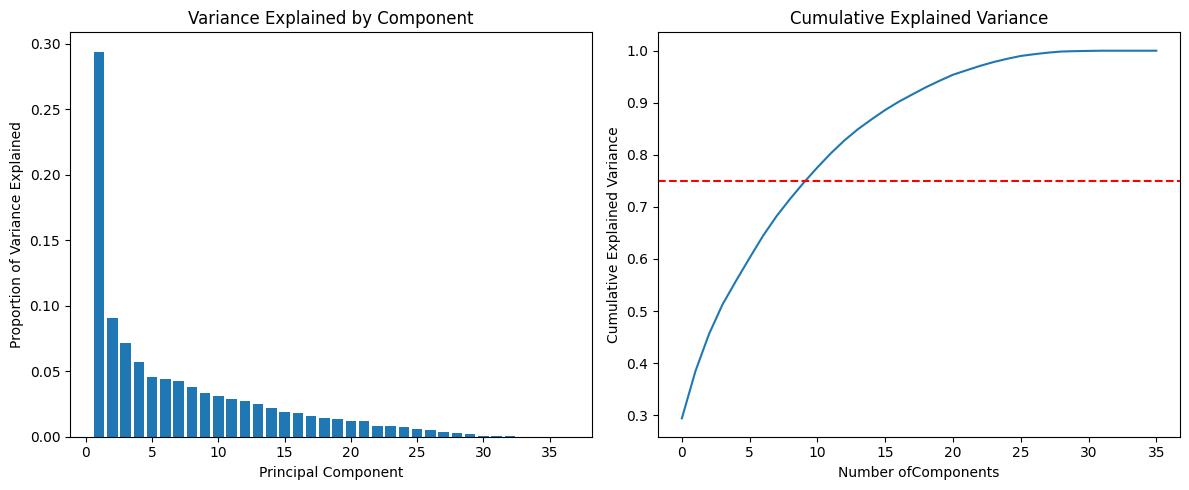

In [28]:
# Explained variance plots
plt.figure(figsize=(12, 5))
    
# Variance by component
plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title('Variance Explained by Component')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
    
# Cumulated Variance
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance')
plt.xlabel('Number ofComponents')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=variance_threshold, color='r', linestyle='--')
plt.tight_layout()
plt.show()


In [29]:
# Reducir dimensionalidad con n componentes
pca_final = PCA(n_components=n_components, random_state=42)
X_pca = pd.DataFrame(pca_final.fit_transform(scaled_model))

#pca = PCA(n_components=7, random_state=42)
# pca_final.fit(scaled_model)

# pca_model = pd.DataFrame(pca.transform(scaled_model), columns=["col1", "col2", "col3", "col4", "col5", "col6", "col7"])

 Plot the first two components and see how the data points are distributed.

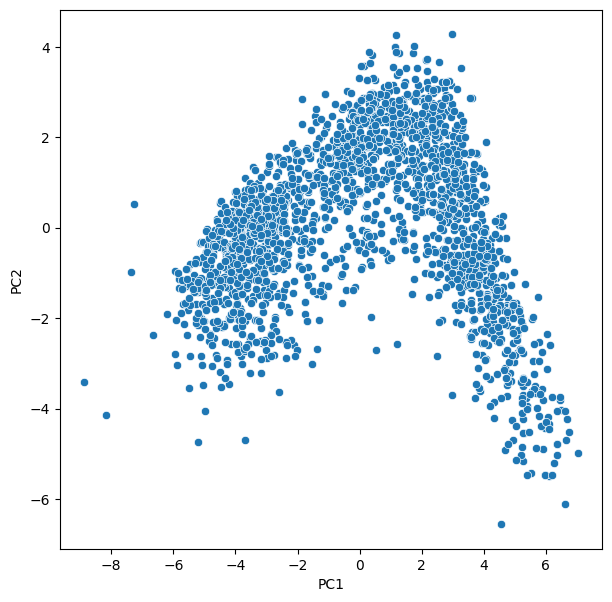

In [30]:
# Scatter plot the first two components
plt.figure(figsize = (7, 7))

sns.scatterplot(x = X_pca[0], y = X_pca[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

K-MEANS  
 Applying clustering algorithms on the data generated after applying PCA

El modelo k-means es un algoritmo de clustering que busca particionar un conjunto de datos en k grupos distintos de manera que cada punto pertenezca al grupo cuyo valor medio es más cercano. Es un método de clustering no supervisado que se utiliza ampliamente para análisis exploratorio de datos y para encontrar patrones naturales en los conjuntos de datos.

#### Apply K-Means Clustering and find the optimal number of clusters using the Elbow Method

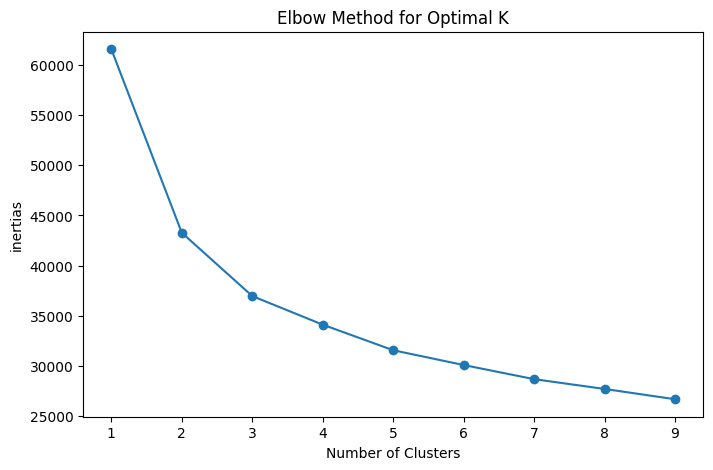

In [31]:
# Rango de valores de k para probar
ks = range(1, 10)
inertias = []

for k in ks:
    # Creación y ajuste de KMeans para cada valor de k
    modelKmeans = KMeans(n_clusters=k, 
                         n_init=10, #Número de veces que el algoritmo k-means se ejecuta
                         max_iter = 10, #Máximo número de iteraciones para una sola ejecución               
                         random_state=42) #semilla
    modelKmeans.fit(X_pca)
    # Almacenamiento de la inercia en la lista
    inertias.append(modelKmeans.inertia_)

#print(inertias)

# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('inertias')
plt.xticks(ks)
plt.title('Elbow Method for Optimal K')
plt.show()



💡 Analysis:  
In the above plot, the elbow is seen for K=3.  
After this point, the decrease is much more gradual.

### EVALUATION

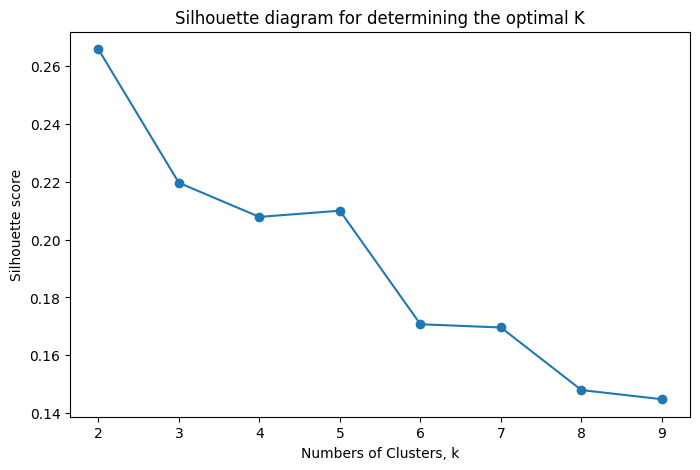

[0.265769234177713,
 0.21961296565691066,
 0.2078273815729167,
 0.2099755423929753,
 0.17073629643824326,
 0.16962012622358644,
 0.14799521367659496,
 0.1448347891310286]

In [32]:
# Finding silhouette score for each value of K
ks = range(2, 10)
silhouette_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_pca, labels))

# Plot of silhouette scores for different values of k
plt.figure(figsize=(8, 5))
plt.plot(ks, silhouette_scores, '-o')
plt.xlabel('Numbers of Clusters, k')
plt.ylabel('Silhouette score')
plt.xticks(ks)
plt.title('Silhouette diagram for determining the optimal K')
plt.show()

silhouette_scores

💡 Analysis :  

El puntaje de silueta más alto se observa para k=2.
From the above silhouette scores, 2 appears to be a good value of K. 
In any case, let's try k=3 as suggest by the elbow method for better differentiation of clusters.

So, let's build K-Means using K=3.

Eleccion numeros de CLUSTERS :  
Best k elbow method : 3  
Best k Silhouette method : 2

Para mayor eficacia y segmentation y tener clusters mas interpretables, se elige k=3

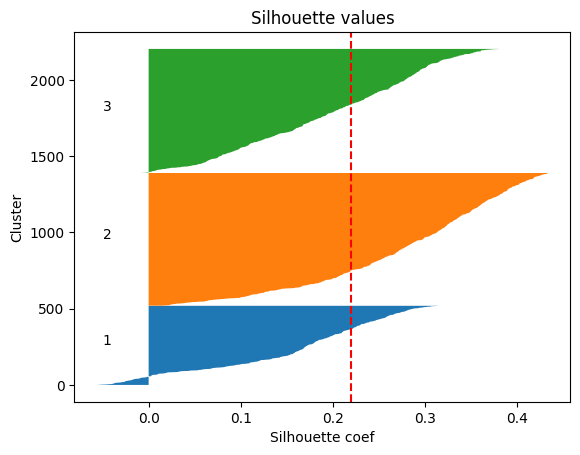

In [33]:
from sklearn.metrics import silhouette_samples

# Opcional: Mostrar los diagramas de silueta para el número óptimo de clusters
optimal_k = 3 #ks[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_pca)
silhouette_vals = silhouette_samples(X_pca, labels)

# Visualización de los valores de silueta para el número óptimo de clusters
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i + 1))
    y_lower += len(cluster_silhouette_vals)

plt.axvline(x=silhouette_score(X_pca, labels), color="red", linestyle="--")
plt.ylabel('Cluster')
plt.xlabel('Silhouette coef')
plt.title('Silhouette values')
plt.show()


This visualization helps evaluate clustering quality.  
The silhouette coefficient measures how similar an object is to its own cluster compared to other clusters, with values ranging from -1 to 1. Higher values indicate better-defined clusters.  

- All three clusters show positive silhouette values, except for some samples(Blue), suggesting potential overlap or misclassification.

- Average Silhouette Score:  
The average silhouette score (red dashed line) is around 0.22. This score is moderately positive, suggesting that the clustering is reasonably good. 

In [34]:
X_pca["Clusters"] = kmeans.labels_ +1                  # add K-Means cluster labels at pca


In [35]:
X_pca["Clusters"].value_counts(normalize=True)

Clusters
2    0.395011
3    0.369161
1    0.235828
Name: proportion, dtype: float64

#### Viasualizo los clusters utilizando PCA

In [36]:
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=Y, data=PCA, hue=cluster)

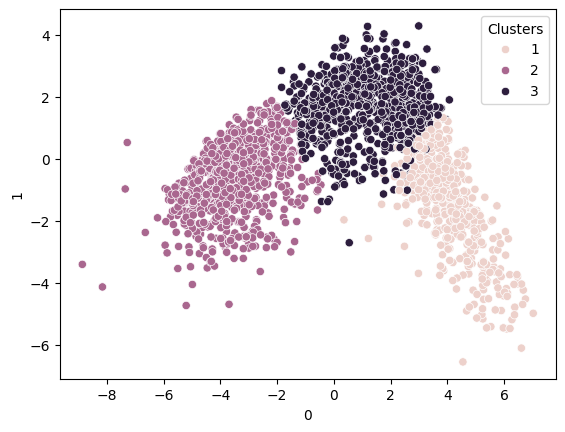

In [37]:
PCA_PLOT(X_pca[0], X_pca[1], X_pca, "Clusters")

### Save Model

In [38]:
joblib.dump(kmeans, cm.MODEL_PATH)

['../models/modelo_Kmeans.joblib']

### Results

## Cluster Profiling

In [39]:
X["Clusters"] = kmeans.labels_  +1

model["Clusters"] = kmeans.labels_  +1

Text(0.5, 1.0, 'Clusters Distribution')

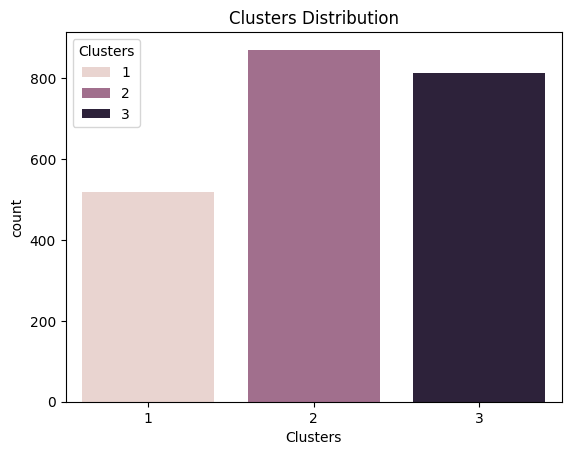

In [40]:
sns.countplot(x='Clusters', data = X, hue='Clusters')
plt.title("Clusters Distribution")

Text(0.5, 1.0, 'Clusters by Income Group')

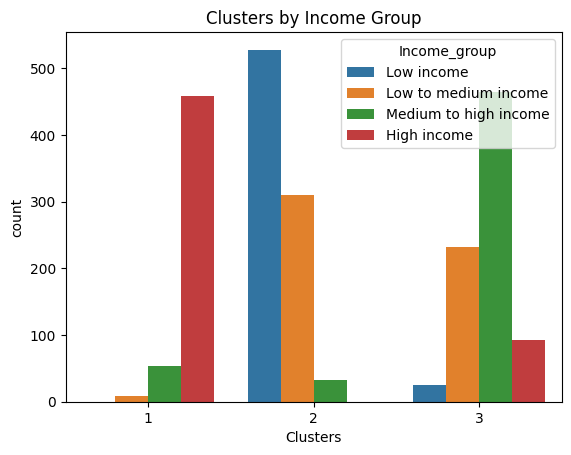

In [41]:
sns.countplot(x='Clusters', data = X, hue = 'Income_group')
plt.title("Clusters by Income Group")

Text(0.5, 1.0, 'Distribution of Customer by Age Group')

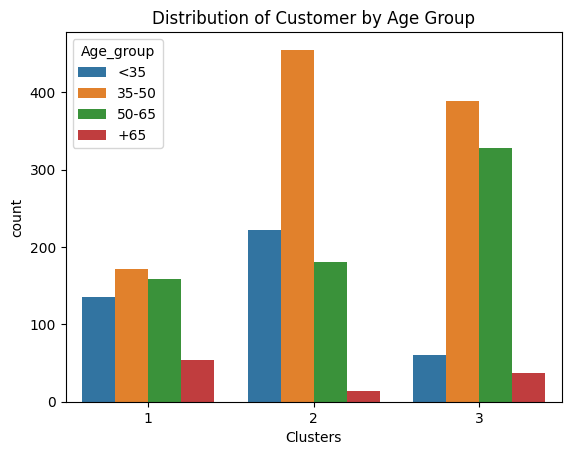

In [ ]:
sns.countplot(x='Clusters', data = X, hue = 'Age_group')
plt.title("Distribution of Customers by Age Group")

Text(0.5, 1.0, 'Distribution of Customer by Edu')

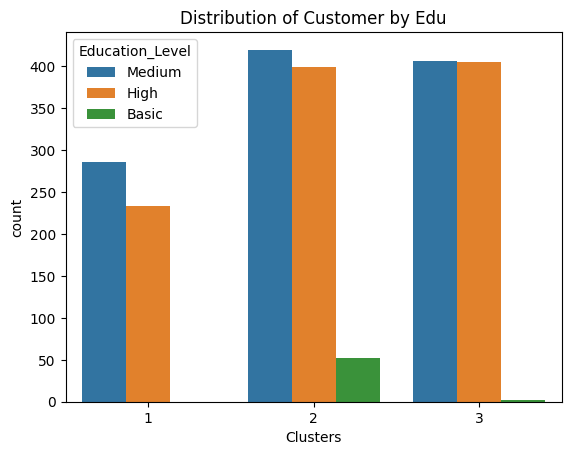

In [43]:
sns.countplot(x='Clusters', data = X, hue = 'Education_Level')
plt.title("Distribution of Customer by Edu")

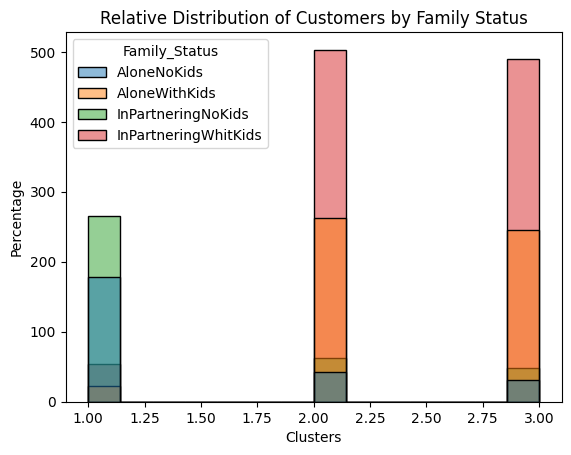

In [44]:
sns.histplot(x='Clusters', data=X, hue='Family_Status')
plt.title("Relative Distribution of Customers by Family Status")
plt.ylabel("Percentage")
plt.show()

sns.countplot(x='Clusters', data=df, hue='Family_Status', stat="percent")

Text(0.5, 1.0, 'Distribution of customers with number of child')

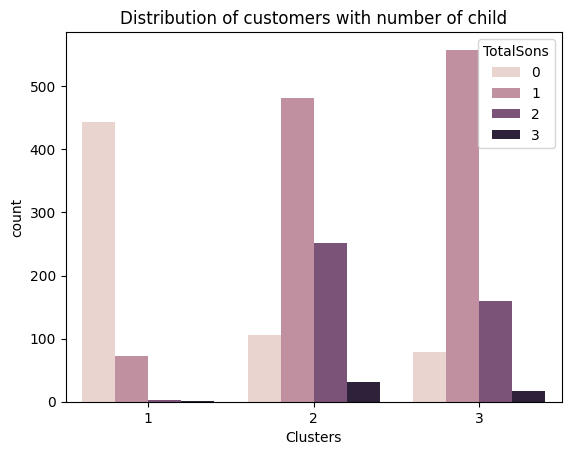

In [ ]:
sns.countplot(x='Clusters', data = X, hue = 'TotalKids')
plt.title("Distribution of customers with number of child")

<Axes: xlabel='Clusters', ylabel='NumWebPurchases'>

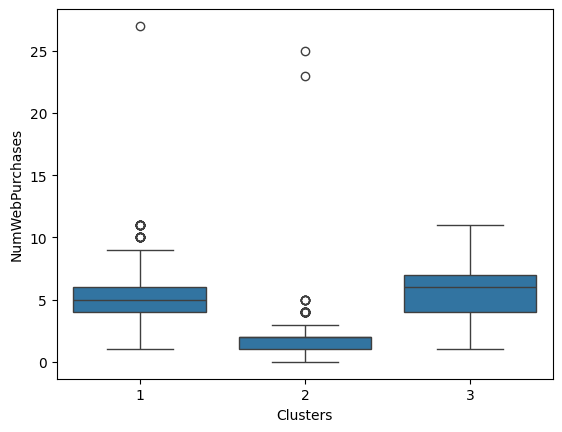

In [46]:
sns.boxplot(x=X["Clusters"], y=X["NumWebPurchases"])

<Axes: xlabel='Clusters', ylabel='AmountPerPurchase'>

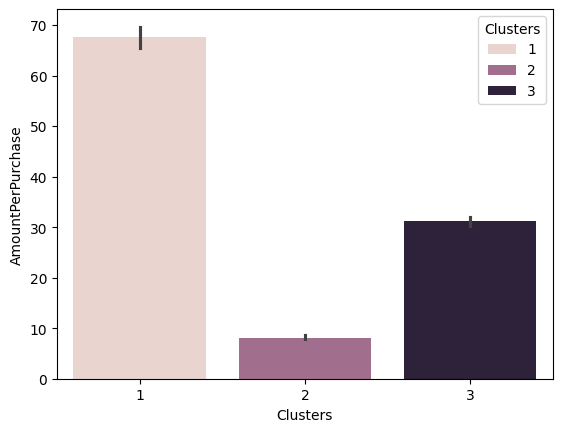

In [47]:
sns.barplot(x=X['Clusters'], y=X['AmountPerPurchase'], hue = X['Clusters'])

<Axes: xlabel='Income', ylabel='Total_Spend'>

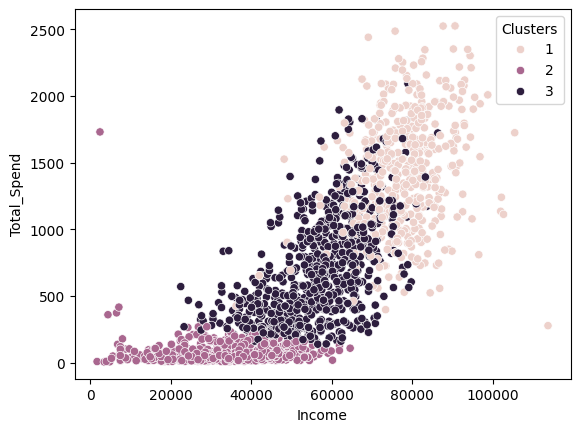

In [48]:
sns.scatterplot(x = 'Income', y = 'Total_Spend', data = X, hue='Clusters')

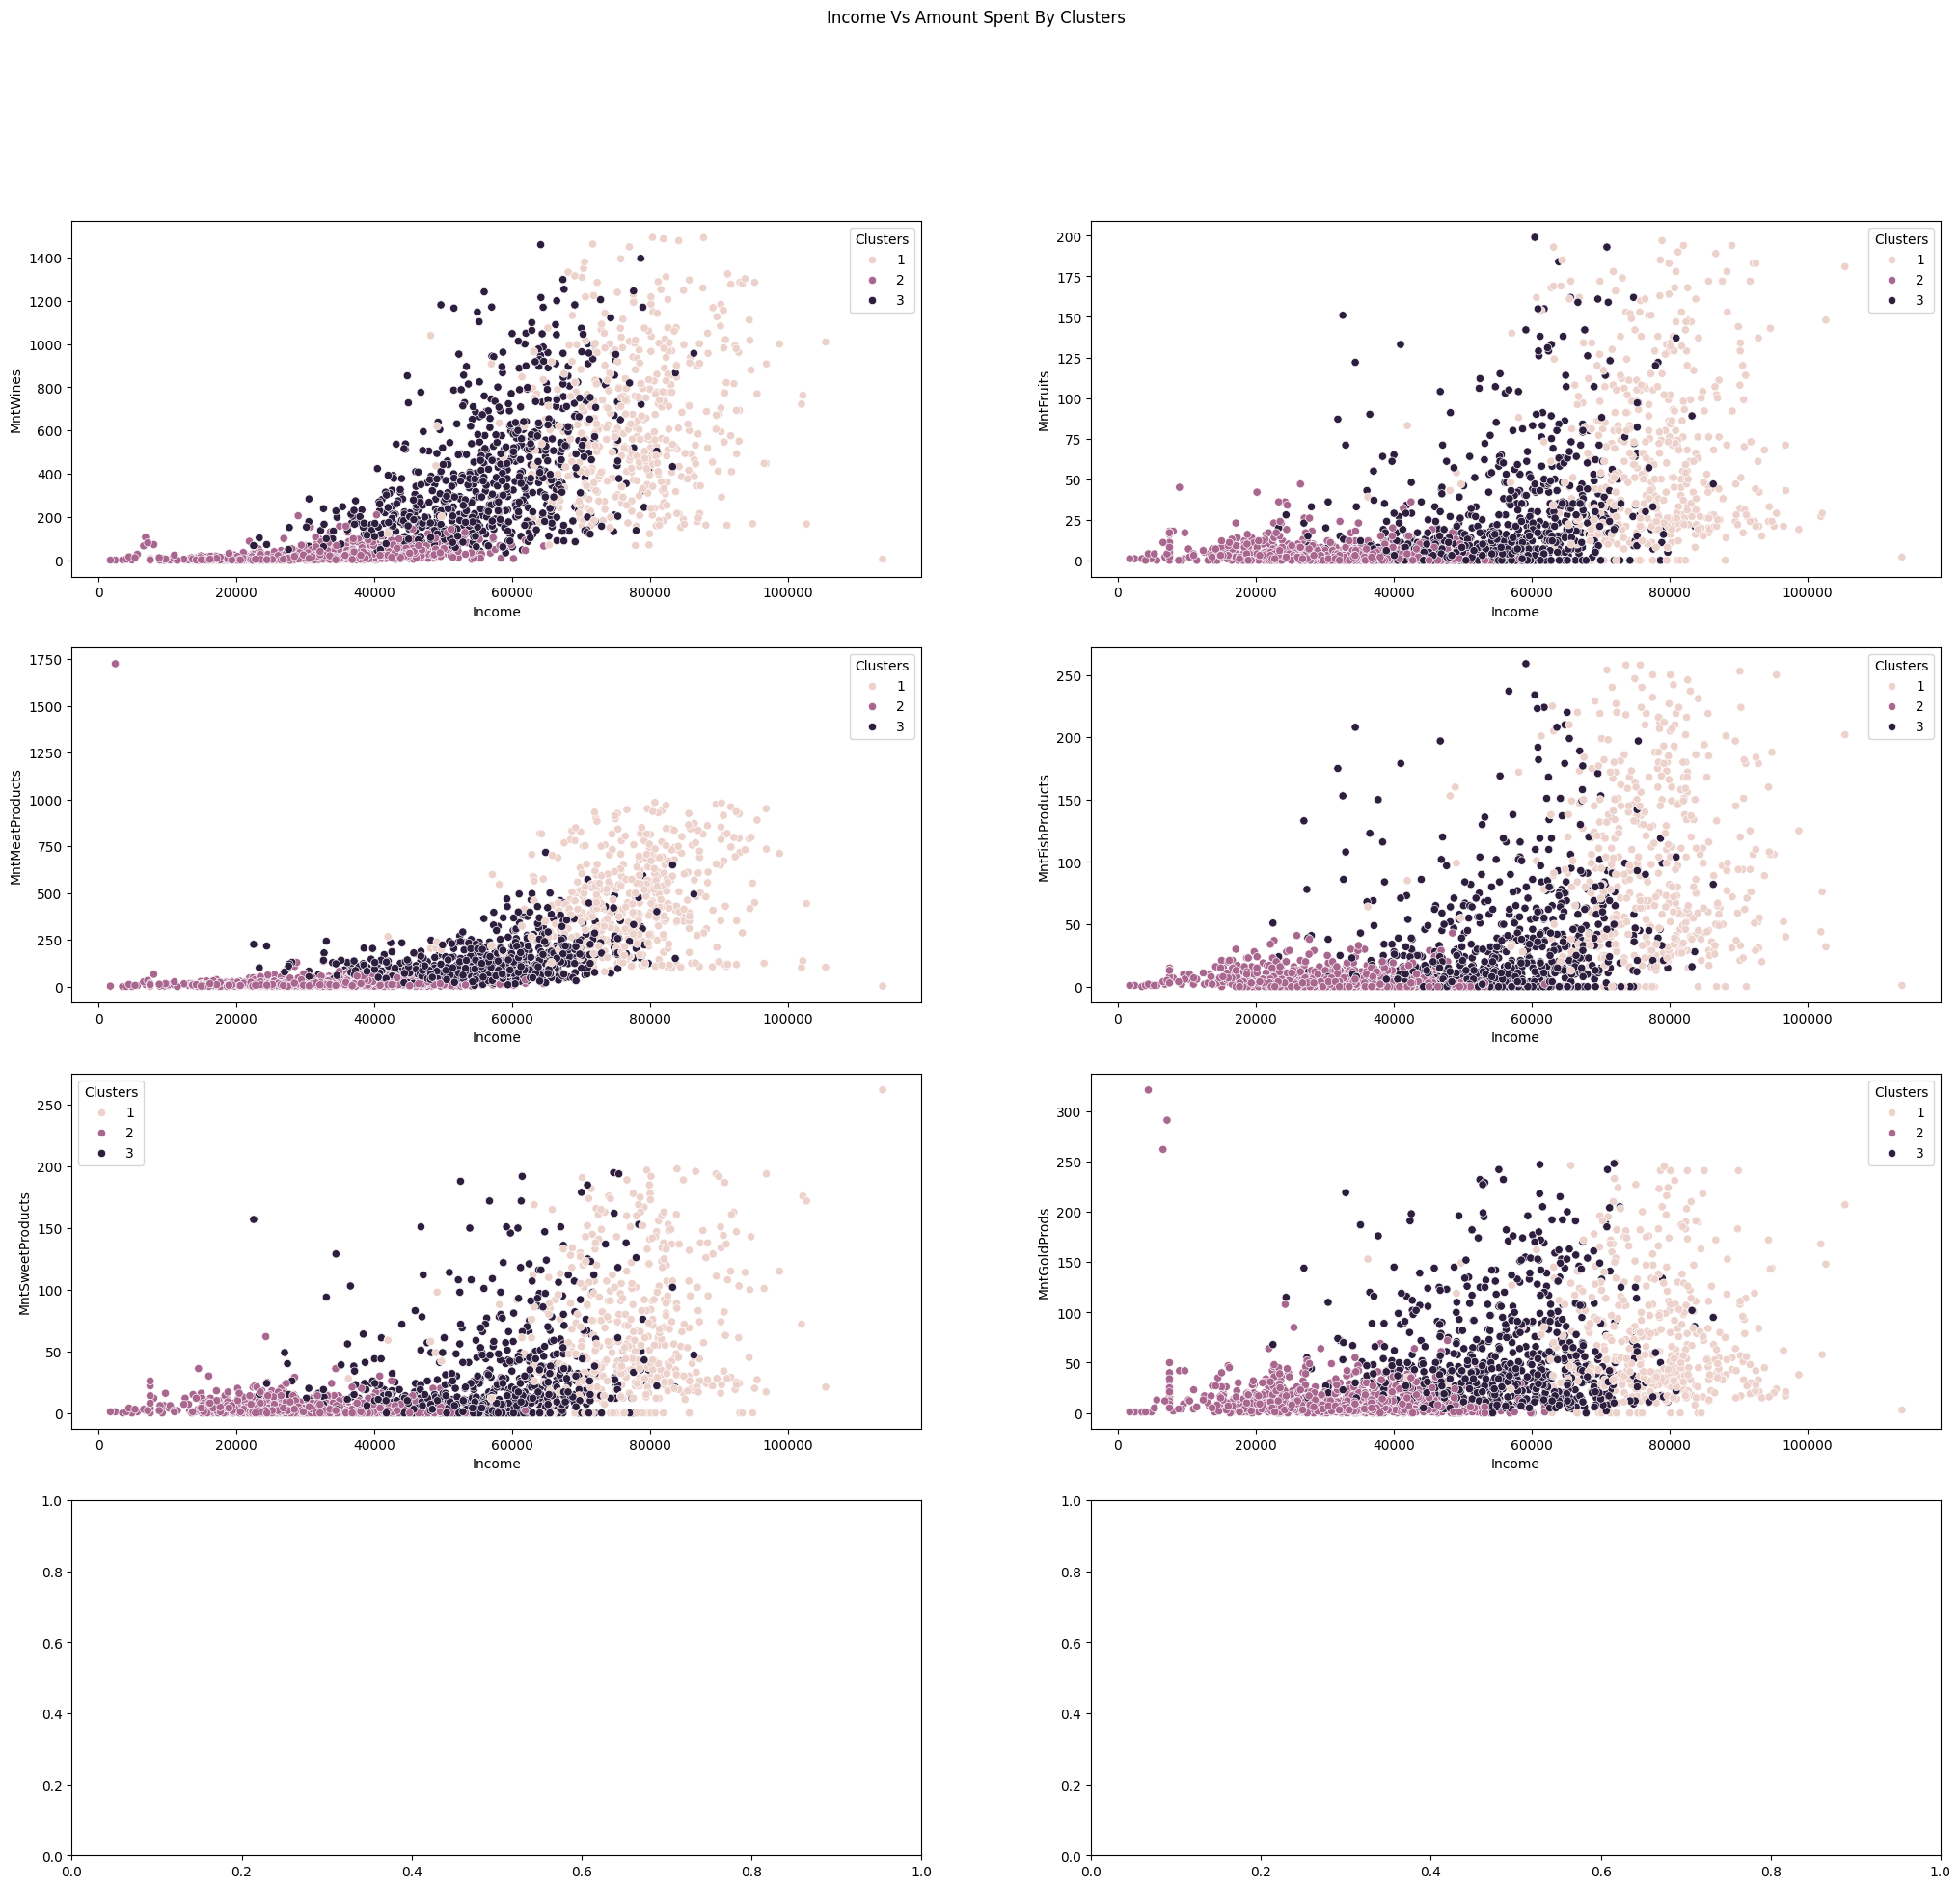

In [49]:
Products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds']

_, ax1 = plt.subplots(4,2, figsize=(25,22))
plt.suptitle('Income Vs Amount Spent By Clusters')

for i, col in enumerate(Products):
    sns.scatterplot(x='Income', y=col, data=X, ax=ax1[i//2, i%2],hue='Clusters')
    
plt.show()

In [50]:
scaled_model.columns

Index(['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Total_Spend',
       'TotalAcceptedCmp', 'TotalPurchases', 'Edu:_Basic', 'Edu:_High',
       'Edu:_Medium', 'AloneNoKids', 'AloneWithKids', 'InPartneringNoKids',
       'InPartneringWhitKids', 'Age:_<35', 'Age:_35-50', 'Age:_50-65',
       'Age:_+65', 'Low income', 'Low to medium income',
       'Medium to high income', 'High income'],
      dtype='object')

In [63]:
scaled_model['Clusters'] = kmeans.labels_ +1

In [64]:
clusters_means_products = scaled_model.groupby('Clusters').mean()[Products]

In [65]:
Expenses = ['Income', 'Total_Spend', 'TotalPurchases', ] #'MediaXcompra'

In [66]:
clusters_means_expenses = scaled_model.groupby('Clusters').mean()[Expenses]

In [67]:
Campaign = ['TotalAcceptedCmp','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response']

In [68]:
clusters_means_campaign = scaled_model.groupby('Clusters').mean()[Campaign]

In [69]:
#Demograf = ['Age_group', 'TotalSons', 'Family_Status', 'Education_Level']

In [70]:
#clusters_means_demograf = scaled_model.groupby('Clusters').mean()[Demograf]

In [71]:
Purchases_Behavior = ['NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']

In [72]:
clusters_means_purchases_behavior = scaled_model.groupby('Clusters').mean()[Purchases_Behavior]

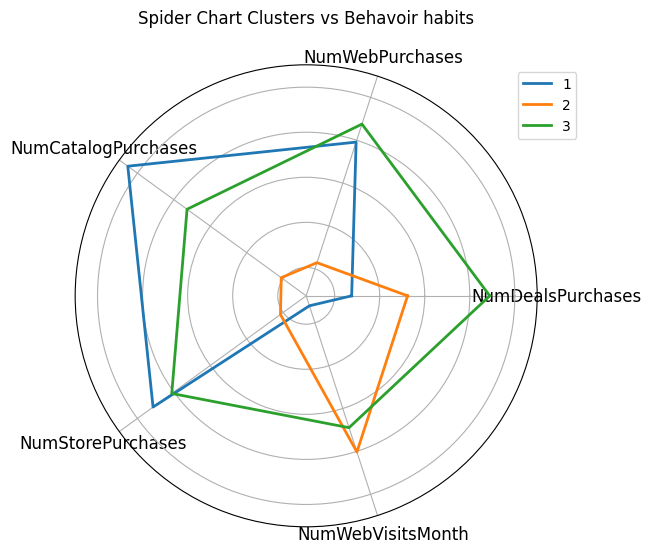

In [79]:
# SPIDER CHART for CLUSTERS PROFILING
# 🔹 Definir etiquetas y ángulos
labels = clusters_means_purchases_behavior.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# 🔹 Cerrar el gráfico (repetir primer valor al final)
angles += angles[:1]

# 🔹 Crear el radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# 🔹 Graficar cada modelo
for idx, row in clusters_means_purchases_behavior.iterrows():
    values = row.tolist()
    values += values[:1]  # Cerrar el gráfico
    ax.plot(angles, values, label=idx, linewidth=2, linestyle='solid')
    # ax.fill(angles, values, alpha=0.2)  # Relleno

# 🔹 Estilizar el gráfico
ax.set_yticklabels([])  # Ocultar etiquetas de los radios
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.set_title("Spider Chart Clusters vs Behavoir habits", pad= 30)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

# 🔹 Mostrar
plt.show()


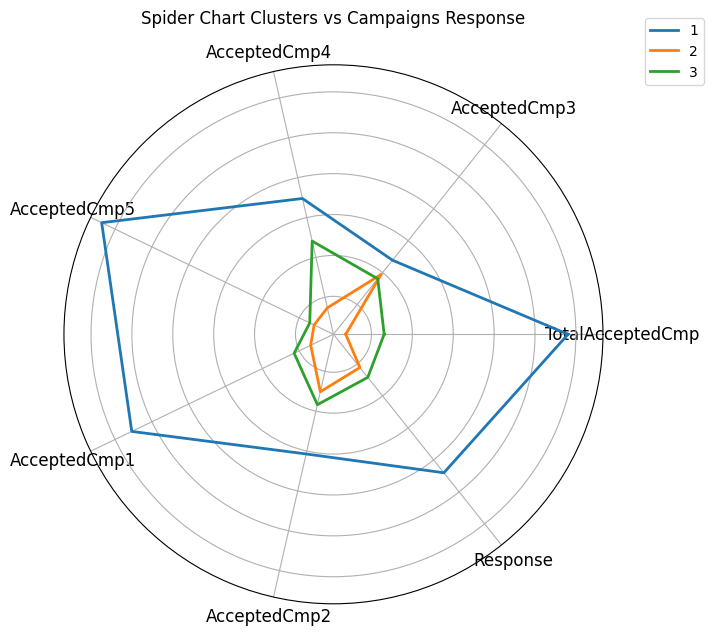

In [81]:
# 🔹 Definir etiquetas y ángulos
labels = clusters_means_campaign.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# 🔹 Cerrar el gráfico (repetir primer valor al final)
angles += angles[:1]

# 🔹 Crear el radar chart
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# 🔹 Graficar cada modelo
for idx, row in clusters_means_campaign.iterrows():
    values = row.tolist()
    values += values[:1]  # Cerrar el gráfico
    ax.plot(angles, values, label=idx, linewidth=2, linestyle='solid')
    # ax.fill(angles, values, alpha=0.2)  # Relleno

# 🔹 Estilizar el gráfico
ax.set_yticklabels([])  # Ocultar etiquetas de los radios
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.set_title("Spider Chart Clusters vs Campaigns Response", pad= 30)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

# 🔹 Mostrar
plt.show()

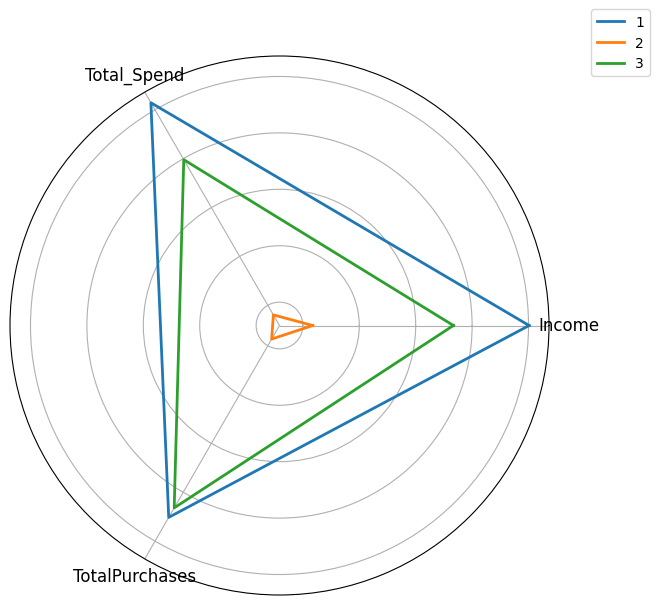

In [75]:
# 🔹 Definir etiquetas y ángulos
labels = clusters_means_expenses.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# 🔹 Cerrar el gráfico (repetir primer valor al final)
angles += angles[:1]

# 🔹 Crear el radar chart
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# 🔹 Graficar cada modelo
for idx, row in clusters_means_expenses.iterrows():
    values = row.tolist()
    values += values[:1]  # Cerrar el gráfico
    ax.plot(angles, values, label=idx, linewidth=2, linestyle='solid')
    # ax.fill(angles, values, alpha=0.2)  # Relleno

# 🔹 Estilizar el gráfico
ax.set_yticklabels([])  # Ocultar etiquetas de los radios
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

# 🔹 Mostrar
plt.show()

In [76]:
sns.pairplot(data , vars=['Spent','Income','Age'] , hue='Children', palette='husl');

NameError: name 'data' is not defined

Crear Graficos agrupados para cluster profil y explicarlo

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

variables = ['Income_group', 'Total_Spend', 'TotalPurchases']

for i, var in enumerate(variables):
    sns.boxplot(x='Clusters', y=var, data=scaled_model.reset_index(), ax=axes[i])
    axes[i].set_title(f"Distribution of {var}")

plt.tight_layout()
plt.show()